In [70]:
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen
import datetime

dfs = []
for amount in ['25000','50000','100000','200000','500000','1000000','1500000']:
    # Extract json from body of html
    url = f"https://stablecoin-simulator-reader.herokuapp.com/data/{amount}"    
    html = urlopen(url).read()
    soup = BeautifulSoup(html)
    body = soup.find('body').get_text().strip()
    
    # load json
    df = pd.read_json(body)

    # Format columns
    df['sellDAIPrice'] = df['prices'].apply(lambda x: x['sellDAIPrice'])
    df['buyDAIPrice'] = df['prices'].apply(lambda x: x['buyDAIPrice'])
    df['datetime'] = df['prices'].apply(lambda x: x['datetime'])
    df['datetime'] = pd.to_datetime(df['datetime'], format = '%Y-%m-%dT%H:%M:%S.%fZ')
    df = df[['datetime','amount','buyDAIPrice','sellDAIPrice']]
    
    # add to list of dfs
    dfs.append(df)

# Combine df for each amount into one df
dai = pd.concat(dfs, axis = 0)

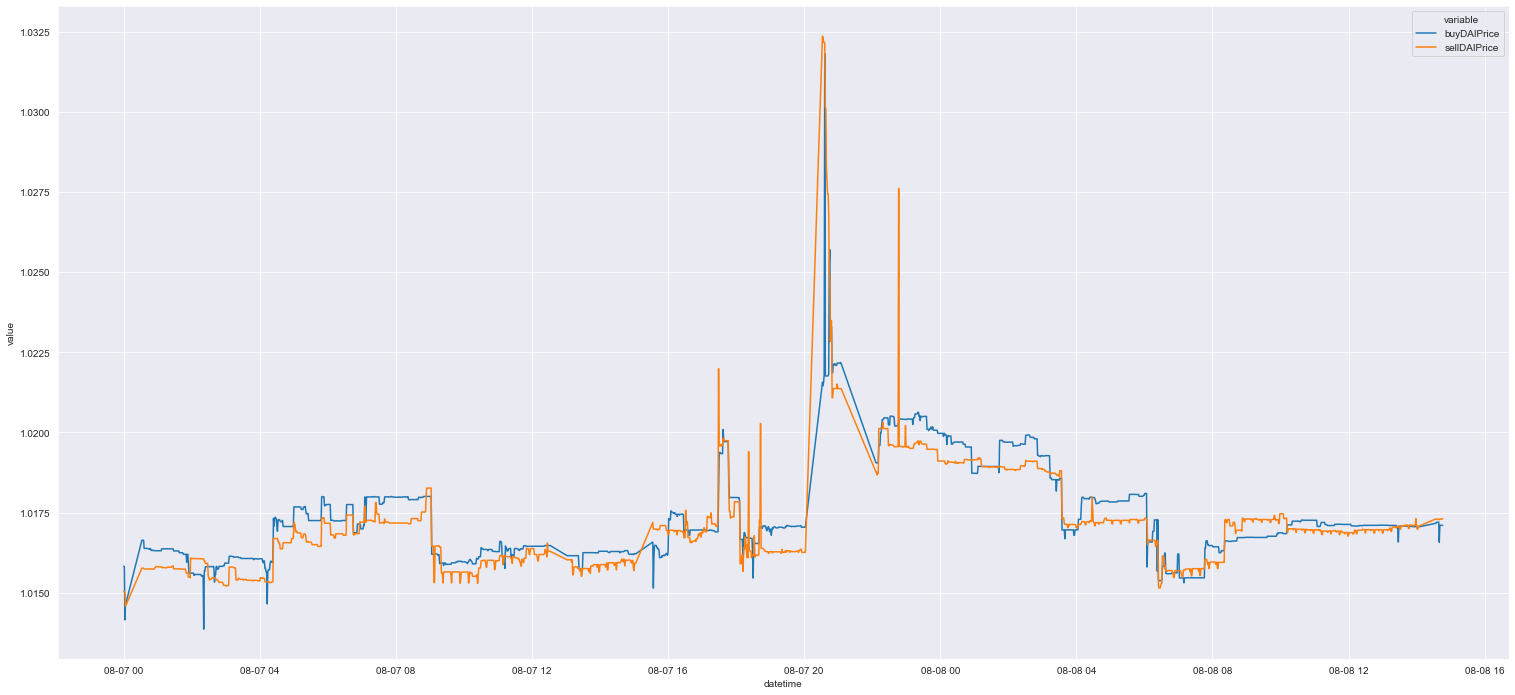

In [63]:
# Test plot
dai_filtered = dai[(dai['datetime'].dt.date >= datetime.date(2020, 8, 7)) & (dai['amount']==25000)]
sns.set_style('darkgrid')
# Plot time series
plt.figure(figsize=(26, 12))
dai_filtered = pd.melt(dai_filtered, id_vars= 'datetime', value_vars=['buyDAIPrice','sellDAIPrice'])
ax = sns.lineplot('datetime','value', data = dai_filtered, hue='variable')

In [62]:
dai_filtered

,datetime,variable,value
0,2020-08-07 00:00:23.555,buyDAIPrice,1.015826
1,2020-08-07 00:01:22.923,buyDAIPrice,1.015811
2,2020-08-07 00:02:23.269,buyDAIPrice,1.014150
3,2020-08-07 00:03:23.470,buyDAIPrice,1.014612
4,2020-08-07 00:32:20.288,buyDAIPrice,1.016635
5,2020-08-07 00:33:20.275,buyDAIPrice,1.016635
6,2020-08-07 00:34:20.254,buyDAIPrice,1.016634
7,2020-08-07 00:35:20.360,buyDAIPrice,1.016634
8,2020-08-07 00:36:20.299,buyDAIPrice,1.016380
9,2020-08-07 00:37:20.359,buyDAIPrice,1.016380


In [9]:
# Get avg slippage for each amount
dai['slippage'] = dai['buyDAIPrice'] - dai['sellDAIPrice']
slippage = dai.groupby('amount')['slippage'].mean()
slippage

amount
25000      0.000435
50000      0.000611
100000     0.000861
200000     0.001243
500000     0.002168
1000000    0.003591
1500000    0.005017
Name: slippage, dtype: float64

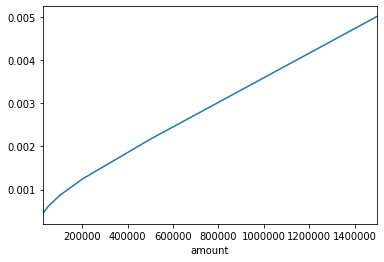

In [8]:

slippage.plot()

In [40]:
df['buy_moving_avg'] = df['buyDAIPrice'].rolling(3 * 60).mean()
df['sell_moving_avg'] = df['sellDAIPrice'].rolling(3 * 60).mean()
df['upper_bound'] = df['sell_moving_avg'] + .002
df['lower_bound'] = df['buy_moving_avg'] - .002

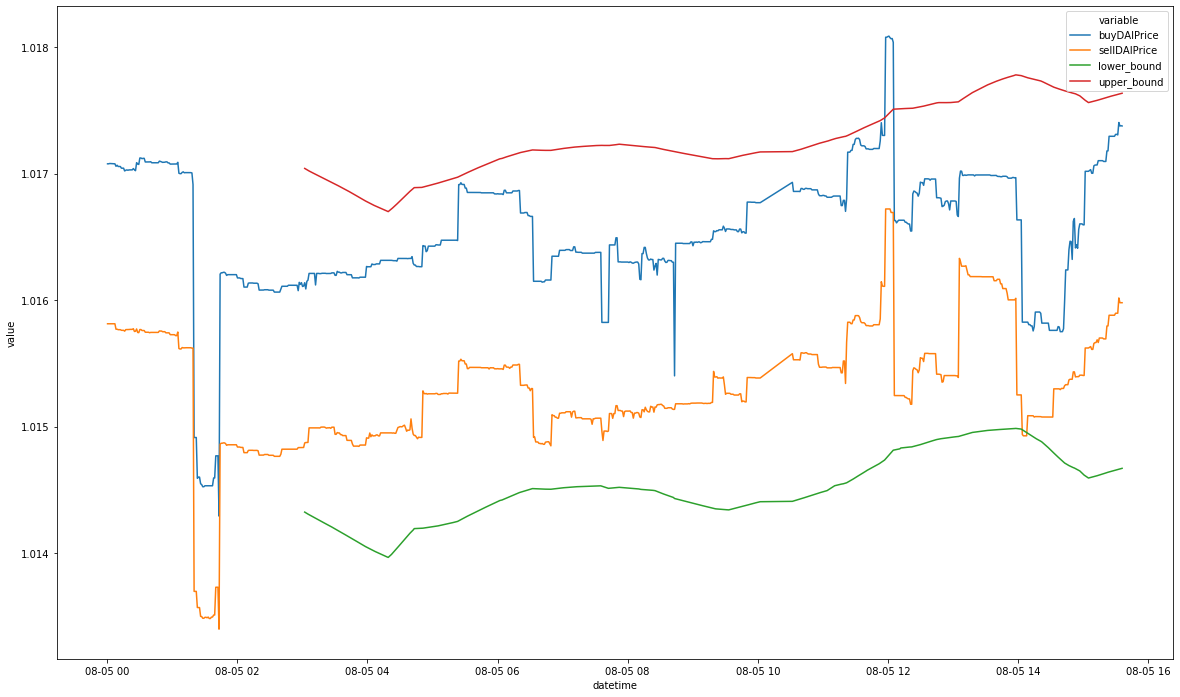

In [51]:
# Time series test plot
# Reshape data into two columns
test = pd.melt(df, id_vars='datetime', value_vars=['buyDAIPrice','sellDAIPrice','lower_bound','upper_bound'])

# Plot
plt.figure(figsize = (20, 12))
sns.lineplot(x = 'datetime', y = 'value', hue = 'variable', data = test)